<a href="https://colab.research.google.com/github/CubatLin/Data-Science-Project/blob/main/NER%20Tagging/NER_CKIPtransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To Do:
* 換IP位置爬
* 換成CKIP tagger(可以自訂義辭典的方式)

In [1]:
import time
start = time.time()

!pip install -U ckip-transformers

     |████████████████████████████████| 3.4 MB 18.6 MB/s 
     |████████████████████████████████| 61 kB 426 kB/s 
     |████████████████████████████████| 895 kB 46.2 MB/s 
     |████████████████████████████████| 3.3 MB 52.9 MB/s 
     |████████████████████████████████| 596 kB 50.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker

In [3]:
# Initialize drivers
ws_driver = CkipWordSegmenter(level=3)
pos_driver = CkipPosTagger(level=3)
ner_driver = CkipNerChunker(level=3)

Downloading:   0%|          | 0.00/804 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/388M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/388M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.62k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/388M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/301 [00:00<?, ?B/s]

## 用特店爬文
* [Regex](https://zh.wikipedia.org/wiki/%E6%AD%A3%E5%88%99%E8%A1%A8%E8%BE%BE%E5%BC%8F)


In [4]:
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import numpy as np
import time
import re
import tensorflow as tf
import time
from random import randint
import warnings
from collections import Counter
from requests.packages.urllib3.exceptions import InsecureRequestWarning
from datetime import datetime
import csv
import ast
import requests  

In [5]:
#簡轉繁
!pip install opencc-python-reimplemented
from opencc import OpenCC
cc = OpenCC('s2tw')

#ignore crawler warning
import urllib3
urllib3.disable_warnings()

     |████████████████████████████████| 484 kB 14.6 MB/s 
  Created wheel for opencc-python-reimplemented: filename=opencc_python_reimplemented-0.1.6-py2.py3-none-any.whl size=486150 sha256=ddc7c72314861fee5cb6a6599f2a6ec1616b9c6860bc713f52e62e3f7ff3c1c7
  Stored in directory: /root/.cache/pip/wheels/4e/e2/60/d062d260be08788bb389521544a8fc173de9a9a78d6a593344
Successfully built opencc-python-reimplemented


In [6]:
import time
import random
#&start=10
def text_crawler_func(word,end_num):
  element_list=[]
  for x in range(0,end_num+10,10):
    url = f"https://google.com.tw/search?q={word}+特點&start={x}"
    headers = {'content-type': 'text/html; charset = UTF-8', 
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36 Edg/95.0.1020.44'}
    result = requests.get(url, verify=False, auth=('user', 'pass'), headers=headers)
    soup = BeautifulSoup(result.text, "html.parser")
    for element in soup.find_all("div", {"class":"VwiC3b yXK7lf MUxGbd yDYNvb lyLwlc lEBKkf"}):
        element_list.append(cc.convert(element.text)) #opencc簡轉繁
  time.sleep(random.uniform(10,40))
  return element_list

In [7]:
%%time
emo_lis = ['誠品書店','金石堂','The Wall LiveHouse','星巴克','路易莎咖啡','大創百貨','光華商場']
res_lis = []
for x in emo_lis:
  res_lis.append(text_crawler_func(x,150))

CPU times: user 6.26 s, sys: 351 ms, total: 6.61 s
Wall time: 4min 10s


In [8]:
for x in range(len(emo_lis)):
  print(res_lis[x][:1])

['7 mrt. 2019 — 全臺最「網美」的書店，港都特色處處都是打卡熱點 · 國境之南的據點，量身打造的「交陪服務」別有溫度 · ·全臺誠品特色門市系列\u200b · · 雲林虎尾店 · · 大直\xa0...']
['金石堂圖書股份有限公司（英語：Kingstone Book Co., Ltd.，簡稱：金石堂書店，英語：Kingstone Bookstore）是臺灣一家同時經營實體與網路書店的圖書通路，由高砂紡織\xa0...']
['這牆音樂藝文展演空間（The Wall Live House），簡稱The Wall，是位於臺北市的音樂展演空間（Livehouse）。 簡介[編輯]. 這牆音樂藝文展演空間由傅鉛文、祝驪雯經營。']
['星巴克成功地創立了一種以創造“星巴克體驗”為特點的“咖啡宗教”。就象麥當勞一直宣導銷售歡樂一樣，星巴克把典型美式文化逐步分解成可以體驗的元素：視覺的溫馨聽覺的\xa0...']
['2 dagen geleden — 最後更新2021年12月28日路易莎品牌故事01 源起路易莎咖啡LOUISA COFFEE的起源早在於第一間門市創立前就開始了。 在2003年，想要喝一杯好喝的咖啡，\xa0...']
[]
[]


[CKIP Example](https://github.com/ckiplab/ckip-transformers)

In [9]:
%%time
# Run pipeline
ws  = ws_driver(res_lis[0])
pos = pos_driver(ws)
ner = ner_driver(res_lis[0])

# Pack word segmentation and part-of-speech results
def pack_ws_pos_sentece(sentence_ws, sentence_pos):
   assert len(sentence_ws) == len(sentence_pos)
   res = []
   for word_ws, word_pos in zip(sentence_ws, sentence_pos):
      res.append(f"{word_ws}({word_pos})")
   return "\u3000".join(res)

# Show results
for sentence, sentence_ws, sentence_pos, sentence_ner in zip(res_lis[0], ws, pos, ner):
   print(sentence)
   print(pack_ws_pos_sentece(sentence_ws, sentence_pos))
   for entity in sentence_ner:
      print(entity)
   print()

Inference: 100%|██████████| 1/1 [01:04<00:00, 64.39s/it]

7 mrt. 2019 — 全臺最「網美」的書店，港都特色處處都是打卡熱點 · 國境之南的據點，量身打造的「交陪服務」別有溫度 · ·全臺誠品特色門市系列​ · · 雲林虎尾店 · · 大直 ...
7 mrt. 2019(Neu)　 — (FW)　全(Neqa)　臺(Nc)　最(Dfa)　「(PARENTHESISCATEGORY)　網美(Nb)　」(PARENTHESISCATEGORY)　的(DE)　書店(Nc)　，(COMMACATEGORY)　港都(Nc)　特色(Na)　處處(D)　都(D)　是(SHI)　打卡(VA)　熱點(Na)　 · (FW)　國境(Nc)　之(DE)　南(Ncd)　的(DE)　據點(Na)　，(COMMACATEGORY)　量(VC)　身(Na)　打造(VC)　的(DE)　「(PARENTHESISCATEGORY)　交陪(VA)　服務(VC)　」(PARENTHESISCATEGORY)　別有(VJ)　溫度(Na)　 ·(FW)　 (WHITESPACE)　·(PERIODCATEGORY)　全(Neqa)　臺(Nc)　誠品(Nb)　特色(Na)　門市(Nc)　系列(Na)　​ (FW)　·(PERIODCATEGORY)　 (WHITESPACE)　·(PERIODCATEGORY)　 (WHITESPACE)　雲林(Nc)　虎尾店(Nc)　 ·(Nb)　 ·(FW)　 (WHITESPACE)　大直(Nc)　 ...(FW)
NerToken(word='臺', ner='GPE', idx=(15, 16))

誠品以「人文、藝術、創意、生活」為核心價值，由推廣閱讀出發，並透過線上網路，傳遞博雅的溫度，打造全新的文化場域。
誠品(Nb)　以(P)　「(PARENTHESISCATEGORY)　人文(Na)　、(PAUSECATEGORY)　藝術(Na)　、(PAUSECATEGORY)　創意(Na)　、(PAUSECATEGORY)　生活(Na)　」(PARENTHESISCATEGORY)　為(VG)　核心(Na)　價值(Na)　，(COMMACATEGORY)　由(P)　推廣(VC)　閱讀(VC)　出發(VA)　，(COMMACATEGORY)　並(Cbb)　透過(P)　線上(Nc)　網路(Na)　，(COMMACATE

爬文爬完後, 做NER清洗, 並運用斷詞&詞性當標籤
* Step 1: 不包含NER(NER是特店, 不是通用標籤)

* Step 2: 斷的詞當標籤(討論度最高的)
* Step 3: 詞性當篩選(哪些詞性不用當標籤)


In [10]:
class Tagging:
  def __init__(self,name,data):
    self.name = name; self.data = data
    self.Regex_func(); self.NER_func(); self.WsPos_func()
    self.Main_word_freq()

  def Regex_func(self):
    t = []
    for l in self.data: 
      #清掉爬蟲日期
      l = re.sub(r"[(A-Za-z) (0-9), (0-9) —]+",'',l)
      #append結果
      t.append(re.sub(r"[^\u4e00-\u9fa5|^(0-9)]+",' ',l) )
    self.data = t
    
  def NER_func(self):
    ner = ner_driver(self.data)
    for i in range(len(self.data)):
      tmp_ner = [x.word for x in ner[i]] 
      tmp_s = self.data[i]
      for x in tmp_ner:
        tmp_s = tmp_s.replace(x,"")
      self.data[i] = tmp_s

  def WsPos_func(self):
    ws = ws_driver(self.data); pos = pos_driver(ws)  
    wspos_res = [self.pack_ws_pos_sentece(sentence_ws, sentence_pos) for sentence_ws, sentence_pos in zip(ws, pos)] #賦值給該function
    self.ws = ws 
    self.wspos_res = wspos_res

  def pack_ws_pos_sentece(self, sentence_ws, sentence_pos): #要加self的原因是告訴這個class這個function有這兩個引數
    assert len(sentence_ws) == len(sentence_pos)
    res = [] #斷詞(詞性)
    for word_ws, word_pos in zip(sentence_ws, sentence_pos):
        res.append(f"{word_ws}({word_pos})")
    return " ".join(res)

  # flattern list :遍歷所有文字, 留下討論度高的
  def Main_word_freq(self,n_freq=7):
    dic ={}
    for l in self.ws:
      for x in l:
        if x not in dic : dic[x]=1
        else : dic[x]+=1
    tmp =[]; tmp_name = []
    for x in dic.items():
      #清除空白 & 特店/特色等字串
      if re.match(r"[^ \s*|^特.]",x[0]):
        if x[1]>n_freq and len(x[0])>1:
          tmp.append((x[0],x[1]))
          tmp_name.append(x[0])
    self.tagging_list = tmp_name
    self.freq_list = tmp

In [11]:
%%time
success_lis = []
for i in range(len(emo_lis)):
  try:
    globals()[f"x{i}"] = Tagging(emo_lis[i],res_lis[i])
    success_lis.append(f"x{i}")
    print(f"x{i} Done!", eval(f"x{i}.name"),'\n')
  except:
    print(f"Fail: '{emo_lis[i]}'")

Inference: 100%|██████████| 1/1 [00:34<00:00, 34.02s/it]


x0 Done! 誠品書店 



Inference: 100%|██████████| 1/1 [00:27<00:00, 27.81s/it]


x1 Done! 金石堂 



Inference: 100%|██████████| 1/1 [00:09<00:00,  9.22s/it]


x2 Done! The Wall LiveHouse 



Inference: 100%|██████████| 1/1 [00:31<00:00, 31.63s/it]


x3 Done! 星巴克 



Inference: 100%|██████████| 1/1 [00:16<00:00, 16.01s/it]


x4 Done! 路易莎咖啡 



Tokenization: 0it [00:00, ?it/s]


Fail: '大創百貨'


Tokenization: 0it [00:00, ?it/s]

Fail: '光華商場'
CPU times: user 6min 1s, sys: 4.89 s, total: 6min 6s
Wall time: 6min 4s


In [12]:
x0.Main_word_freq(n_freq=3)
print(x0.name,'\n')
x0.tagging_list

誠品書店 



['書店',
 '打造',
 '服務',
 '誠品',
 '人文',
 '藝術',
 '創意',
 '生活',
 '核心',
 '價值',
 '推廣',
 '閱讀',
 '網路',
 '全新',
 '文化',
 '除了',
 '空間',
 '包含',
 '傳統',
 '相關',
 '信義',
 '超過',
 '多角化',
 '經營',
 '方式',
 '分店',
 '不同',
 '地區',
 '商品',
 '活動',
 '以及',
 '複合式',
 '營運',
 '模式',
 '獨立',
 '區域',
 '社區',
 '亮點',
 '咖啡',
 '敦南店',
 '發展',
 '消費',
 '理念',
 '品牌',
 '其他',
 '實體',
 '氛圍',
 '文章',
 '重要',
 '設計',
 '想要',
 '目前',
 '風格',
 '商場',
 '美食',
 '大型',
 '連鎖',
 '精品',
 '書籍',
 '知名',
 '市場',
 '文創',
 '結合',
 '讀者',
 '同時',
 '可以',
 '文青',
 '正式',
 '期間',
 '限定店',
 '合作',
 '小時',
 '景點',
 '如何',
 '百貨',
 '創辦人',
 '內容',
 '出版人',
 '時代',
 '公司',
 '未來',
 '地方',
 '企業',
 '主要',
 '時間',
 '位於',
 '成為',
 '不少',
 '沒有',
 '推出',
 '店面',
 '甚至',
 '提供',
 '營業',
 '工作',
 '文具',
 '人們',
 '結束',
 '狀態']

In [13]:
x1.Main_word_freq(n_freq=2)
print(x1.name,'\n')
x1.tagging_list

金石堂 



['同時',
 '經營',
 '實體',
 '網路',
 '書店',
 '圖書',
 '通路',
 '包含',
 '書籍',
 '商品',
 '文具',
 '優惠',
 '活動',
 '閱讀',
 '文化',
 '市場',
 '提供',
 '方便',
 '服務',
 '管理',
 '品牌',
 '推薦',
 '分析',
 '值得',
 '讀者',
 '民眾',
 '現代',
 '呈現',
 '金石堂',
 '大型',
 '連鎖',
 '門市',
 '成立',
 '複合式',
 '結合',
 '現金',
 '回饋',
 '處理',
 '使用',
 '漫畫',
 '購買',
 '老子',
 '變化',
 '由於',
 '如何',
 '策略',
 '記者',
 '全知',
 '視角',
 '價格',
 '小說',
 '歷史',
 '想要',
 '簡介',
 '出版',
 '分享',
 '介紹',
 '好康',
 '情報',
 '如下',
 '發展',
 '博客來',
 '尖端',
 '官網',
 '敬請',
 '產品',
 '方面',
 '現況',
 '販售',
 '傳統',
 '誠品',
 '成為',
 '研究',
 '以為',
 '其中',
 '東西',
 '最多',
 '線上',
 '設計',
 '繪製',
 '除了',
 '自己',
 '內容',
 '其他',
 '技術',
 '可以',
 '類型',
 '好書',
 '精選',
 '排行榜',
 '暢銷書',
 '材質',
 '輕柔',
 '乾淨',
 '安全',
 '無毒',
 '殘留',
 '方法',
 '說明書',
 '造型',
 '自然',
 '存放',
 '讀冊',
 '學習',
 '國內外',
 '玩具',
 '精品',
 '動漫',
 '模型',
 '訓練',
 '最近',
 '我們',
 '非常',
 '說明',
 '擬真',
 '試題',
 '安利美特',
 '那麼',
 '贈品',
 '實務',
 '工作',
 '套票',
 '因為',
 '相關',
 '售票網',
 '彩色',
 '標誌',
 '導視',
 '親子',
 '性格',
 '能源',
 '化工',
 '形成',
 '遊戲',
 '自卑',
 '情結',
 '景觀']

In [14]:
x2.Main_word_freq(n_freq=2)
print(x2.name,'\n')
x2.tagging_list

The Wall LiveHouse 



['音樂',
 '藝文',
 '展演',
 '空間',
 '位於',
 '場地',
 '傳統',
 '在於',
 '樂器',
 '配置',
 '貝斯',
 '鼓 ',
 '顯著',
 '技巧',
 '表現',
 '取代',
 '公館',
 '地區',
 '文化',
 '我們',
 '主題',
 '景點',
 '容納',
 '演出',
 '知名',
 '商圈',
 '樂團',
 '表演',
 '女巫店',
 '社會',
 '好友',
 '門票',
 '其他',
 '酒吧',
 '因為',
 '音樂人',
 '交流',
 '結合',
 '成為',
 '雖然']

In [15]:
x3.Main_word_freq(n_freq=1)
print(x3.name,'\n')
x3.tagging_list

星巴克 



['成功',
 '創立',
 '創造',
 '體驗',
 '咖啡',
 '宗教',
 '文化',
 '可以',
 '元素',
 '產地',
 '最終',
 '成為',
 '我們',
 '堅持',
 '烘焙',
 '品質',
 '基本',
 '原則',
 '咖啡館',
 '總是',
 '留戀',
 '地方',
 '喝完',
 '覺得',
 '周圍',
 '環境',
 '歷史',
 '以及',
 '品牌',
 '對於',
 '耳熟能詳',
 '名字',
 '最早',
 '來源於',
 '世紀',
 '文壇',
 '傑出',
 '大師',
 '經典',
 '濃縮',
 '口味',
 '焦糖',
 '拿鐵',
 '價格',
 '種類',
 '作者',
 '來源',
 '手衝',
 '精品',
 '焦糖味',
 '濃郁',
 '牛奶',
 '奶油',
 '使用',
 '具有',
 '鮮明',
 '建議',
 '搭配',
 '星巴克',
 '著作',
 '同時',
 '獨特',
 '風味',
 '口感',
 '世界',
 '以為',
 '他們',
 '深度',
 '萃取',
 '技術',
 '咖啡 ',
 '咖啡因',
 '當時',
 '提倡',
 '健康',
 '時尚',
 '消費',
 '顧客',
 '不必',
 '一般',
 '設計',
 '模式',
 '產品',
 '優勢',
 '項目',
 '生活',
 '工作',
 '因為',
 '城市',
 '來到',
 '語義性',
 '推出',
 '結合',
 '利用',
 '常態',
 '咖啡豆',
 '按照',
 '程度',
 '不同',
 '進行',
 '劃分為',
 '中度',
 '酸度',
 '其中',
 '裝修',
 '關係',
 '小編',
 '細節',
 '理念',
 '方面',
 '注重',
 '根據',
 '成分',
 '所以',
 '上面',
 '綜觀',
 '這些',
 '連鎖',
 '有些',
 '餐 ',
 '主軸',
 '如果',
 '外觀',
 '裝璜',
 '門市',
 '多元',
 '約請',
 '民眾',
 '休憩品',
 '人群',
 '定位',
 '官方',
 '服務',
 '時代',
 '咖啡機',
 '組織',
 '業務',
 '戰略',
 '管理',
 '研究',
 '企業',


In [16]:
x4.Main_word_freq(n_freq=1)
print(x4.name,'\n')
x4.tagging_list

路易莎咖啡 



['品牌',
 '咖啡',
 '門市',
 '創立',
 '開始',
 '年 ',
 '好喝',
 '除了',
 '追求',
 '咖啡豆',
 '路易莎',
 '咖啡師',
 '設計',
 '體驗',
 '手沖',
 '風味',
 '烘焙',
 '成功',
 '國際',
 '精品',
 '因應',
 '生活',
 '提供',
 '服務',
 '消費者',
 '可以',
 '實惠',
 '咖啡館',
 '平價',
 '快速',
 '環境',
 '精緻',
 '分店數',
 '一度',
 '超越',
 '連鎖',
 '龍頭',
 '積極',
 '開幕',
 '分店',
 '地點',
 '位在',
 '超過',
 '本土',
 '網友',
 '缺少',
 '字詞',
 '懂得',
 '行家',
 '創辦人',
 '強烈',
 '震撼',
 '味蕾',
 '定下',
 '決心',
 '堅持',
 '手工',
 '細細',
 '翻動',
 '核心',
 '所有',
 '專業',
 '烘豆師',
 '親手',
 '親自',
 '烘培',
 '新鮮度',
 '為了',
 '掌握',
 '供應',
 '獨家',
 '全球',
 '而且',
 '圖片',
 '創業',
 '他們',
 '擁有',
 '進口',
 '知名',
 '火侯',
 '時間',
 '火焰',
 '猶如',
 '登錄',
 '興櫃',
 '成為',
 '沒有',
 '成立',
 '義式',
 '職人',
 '尋覓',
 '透過',
 '黑卡',
 '優惠',
 '推廣',
 '總公司',
 '發展',
 '空間',
 '籌備',
 '直營',
 '加盟',
 '設有',
 '女神',
 '美味',
 '精神',
 '建成',
 '線上',
 '烘豆機',
 '選擇',
 '進行',
 '細緻',
 '其他',
 '不只',
 '開設',
 '風格',
 '店面',
 '座位',
 '搭配',
 '逛逛',
 '市場',
 '輕食',
 '質感',
 '在地',
 '文化',
 '競爭',
 '以及',
 '輕鬆',
 '咖啡店',
 '形象',
 '附近',
 '圖書館',
 '結合',
 '識別',
 '陸續',
 '合作',
 '地方',
 '社區',
 '現在',
 '簡餐',
 '早午餐',
 '餐食',

### Build Dict
* key:對應特店的位置
* Input標籤集合, Output特店名稱
* 一個class, Input一個list, 物件裡面存標籤&名字

In [17]:
from collections import defaultdict
InquireDic = defaultdict()

#把成功的list存成user方便查找的dict
for x in success_lis:
  tmp = eval(f"{x}")
  for elem in tmp.tagging_list:
    if elem not in InquireDic:
      InquireDic[elem] = [tmp.name]
    else:
      InquireDic[elem].append(tmp.name)

In [18]:
def SearchStore_func(taglist, InqDic):
  res = []
  for x in taglist:
    res.extend(InqDic[x])
  return set(res)

In [19]:
SearchStore_func(['文青','藝文','藝術','咖啡'],InquireDic)

{'The Wall LiveHouse', '星巴克', '誠品書店', '路易莎咖啡'}

In [20]:
SearchStore_func(["文青",'書店','咖啡'],InquireDic)

{'星巴克', '誠品書店', '路易莎咖啡', '金石堂'}

In [21]:
end = time.time()
print('Run Time: ',format(end-start))

Run Time:  1143.2279467582703


# Origin
* text cleansing

In [ ]:
import re
t = []
for l in res_lis[2]: #先拿誠品書局來當範例
  #先清掉爬蟲日期
  l = re.sub(r"[(A-Za-z) (0-9), (0-9) —]+",'',l)
  #再append結果
  t.append(re.sub(r"[^\u4e00-\u9fa5|^(0-9)]+",' ',l) )

In [ ]:
t[:5]

['這牆音樂藝文展演空間 簡稱 是位於臺北市的音樂展演空間 簡介 編輯 這牆音樂藝文展演空間由傅鉛文 祝驪雯經營 ',
 ' 場地租借洽詢 檔期查詢 或粉絲專頁私訊 ',
 '傳統的特點在於三種樂器配置 電吉他 貝斯 鼓 與顯著的電吉他技巧表現 但 鹿洐人 則是由木吉他取代電吉他的位置 編曲上平均分配三樣樂器表現空間 著重 ',
 '公館地區儼然已塑造出自身獨特的地區文化 可說是來臺北不可不遊的必經之地 我們的研究主題 這牆音樂藝文展演空間即是從此產生的特色經營之一 在 ',
 ' 臺北市羅斯福路四段號捷運公館站一號出口徒步分 ']

先把NER的字挑掉

In [ ]:
%%time
#NER Token
ner = ner_driver(t)

Inference: 100%|██████████| 1/1 [00:19<00:00, 19.18s/it]

CPU times: user 19.1 s, sys: 85 ms, total: 19.2 s
Wall time: 19.2 s


In [ ]:
%%time
#NER取代
for i in range(len(t)):
  tmp_ner = [x.word for x in ner[i]] 
  tmp_s = t[i]
  for x in tmp_ner:
    tmp_s = tmp_s.replace(x,"")
  t[i] = tmp_s

CPU times: user 168 µs, sys: 0 ns, total: 168 µs
Wall time: 173 µs


In [ ]:
t[:5]

['這牆音樂藝文展演空間 簡稱 是位於的音樂展演空間 簡介 編輯 這牆音樂藝文展演空間由 經營 ',
 ' 場地租借洽詢 檔期查詢 或粉絲專頁私訊 ',
 '傳統的特點在於種樂器配置  貝斯 鼓 與顯著的技巧表現 但 鹿洐人 則是由取代的位置 編曲上平均分配樣樂器表現空間 著重 ',
 '公館地區儼然已塑造出自身獨特的地區文化 可說是來不可不遊的必經之地 我們的研究主題 這牆音樂藝文展演空間即是從此產生的特色經營之一 在 ',
 ' 羅斯福路四段號號出口徒步分 ']

挑掉NER的字後, 接下來斷字找詞性

In [ ]:
%%time
ws = ws_driver(t); pos = pos_driver(ws)

Inference: 100%|██████████| 1/1 [00:17<00:00, 17.02s/it]

CPU times: user 34 s, sys: 180 ms, total: 34.2 s
Wall time: 34 s


In [ ]:
# Pack word segmentation and part-of-speech results
def pack_ws_pos_sentece(sentence_ws, sentence_pos):
   assert len(sentence_ws) == len(sentence_pos)
   res = [] #斷詞(詞性)
   for word_ws, word_pos in zip(sentence_ws, sentence_pos):
      res.append(f"{word_ws}({word_pos})")
   return " ".join(res)
   
wspos_res = [pack_ws_pos_sentece(sentence_ws, sentence_pos) for sentence, sentence_ws, sentence_pos in zip(t, ws, pos)]

### 計算詞頻&TF-IDF

In [ ]:
# flattern list :遍歷所有文字, 留下討論度高的
def word_freq_func(lis_):
  for x in lis_:
    if x not in dic : dic[x]=1
    else : dic[x]+=1

dic ={}
for l in ws:
  word_freq_func(l)

In [ ]:
tmp =[]
tmp_freq = []
for x in dic.items():
  if x[1]>7 and len(x[0])>1:
    print(x)
    tmp.append(x[0])
    tmp_freq.append(x[1])

('音樂', 21)
('藝文', 9)
('展演', 17)
('空間', 24)
('特點', 11)
('特色', 9)
('表演', 9)
('酒吧', 8)


In [ ]:
%%time
ws_tmp = ws_driver(tmp); pos_tmp = pos_driver(ws_tmp)

Inference: 100%|██████████| 1/1 [00:00<00:00,  6.96it/s]

CPU times: user 312 ms, sys: 7.98 ms, total: 320 ms
Wall time: 324 ms


In [ ]:
for x , y ,z in zip(ws_tmp,pos_tmp,tmp_freq):
  print(f"{x[0]}({y[0]}): {z}")

音樂(Na): 21
藝文(A): 9
展演(VC): 17
空間(Na): 24
特點(Na): 11
特色(Na): 9
表演(VC): 9
酒吧(Nc): 8


In [ ]:
for x , y ,z in zip(ws_tmp,pos_tmp,tmp_freq):
  print(f"{x[0]}({y[0]}): {z}")

音樂(Na): 21
藝文(A): 9
展演(VC): 17
空間(Na): 24
特點(Na): 11
特色(Na): 9
表演(VC): 9
酒吧(Nc): 8


## Reference: 
* 同意詞: 
```
!pip install -U synonyms
!python -c "import synonyms" # download word vectors file
import synonyms
synlst = synonyms.display('良師益友')
```
* NLP 關鍵字抽取:
```
from nltk.corpus import wordnet as wn
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wn.synset('spy.n.01').lemma_names('jpn')


# Crawler Done

In [ ]:
!pip install selenium

     |████████████████████████████████| 958 kB 14.7 MB/s 
     |████████████████████████████████| 356 kB 35.0 MB/s 
     |████████████████████████████████| 138 kB 34.0 MB/s 
     |████████████████████████████████| 3.6 MB 51.3 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import numpy as np
import time
import re
import tensorflow as tf
import time
from random import randint
import warnings
from collections import Counter
from requests.packages.urllib3.exceptions import InsecureRequestWarning
from datetime import datetime
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options
import csv
import ast
import requests  

In [ ]:
def address_google(store_list, start, end):
    """
    store_list -> 從資料源萃取出之目標名單
    start -> 起點
    end -> 終點
    """
    cnt = 0
    num = 0
    Text = {}
    store_address = {}
    invalid_list = []
    warnings.simplefilter('ignore', InsecureRequestWarning)
    dictionary = {
        '0': '零', '1': '一', '2': '二', '3': '三', '4': '四',
        '5': '五', '6': '六', '7': '七', '8': '八', '9': '九', '10': '十'
    }
    headers = {'content-type': 'text/html; charset = UTF-8', 
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36 Edg/95.0.1020.44'
          }
    time_list = []
    for idx, store in enumerate(store_list[start:end]):
        start_time = time.time()
        url = f"https://google.com/search?q={store}+地址"
        print('url ', store)
        cnt+=1
        try:
            result = requests.get(url, verify=False, auth=('user', 'pass'), headers=headers)
            soup = BeautifulSoup(result.text, "html.parser")
            content_list = []
            element_list = []
            if soup.find_all("div", {"class":"sXLaOe"}):
                for element in soup.find_all("div", {"class":"sXLaOe"}):
                    element_list.append(element.text)
            for element in soup.find_all("div", {"class":"VwiC3b yXK7lf MUxGbd yDYNvb lyLwlc lEBKkf"}):
                element_list.append(element.text)
            element_list = list(set(element_list))
            for text in element_list:
                content_list.append(''.join(text.split()))
            store_address[store]=content_list
            print('Scarpping Seccessful!')
            cost = time.time() - start_time
            print("--- %s seconds ---" % (cost))
            if cost < 5:
                time.sleep(7)
            time_list.append(cost)
        except Exception as e:
            invalid_list.append(store)
            num += 1
            # print('sleep : ', 10)
            store_address[store] = ''
            # time.sleep(10)
            cost = time.time() - start_time
            print("--- %s seconds ---" % (cost))
            time_list.append(cost)
            if cost < 5:
                time.sleep(6)
            pass
        # 每執行10筆進行存取
        if len(store_address) % 10 == 0:
            filename = f'Merchant_Output_{start}_{end}'
            output_df = pd.DataFrame({'merchant_cdesc_cleansed':store_list[start:start+cnt], 'Text':list(store_address.values())})
            # 存取路徑
            upload_df_to_gcs(output_df, filename)
            print('Count : ', len(store_address))
            logging.info(f'{filename} Saved')
            print("--- %s average seconds per merchant ---" % (np.mean(time_list)))
        if num == 10:
            time.sleep(1800)
            num = 0
    filename = f'Merchant_Output_{start}_{end}'
    output_df = pd.DataFrame({'merchant_cdesc_cleansed':store_list[start:start+cnt], 'Text':list(store_address.values())})
    # 執行完畢進行存取
    return output_df

In [ ]:
df = address_google(['味益食品行', '味自鰻三河中川屋', '味覺南國'], 0,3)

url  味益食品行
Scarpping Seccessful!
--- 1.388199806213379 seconds ---
url  味自鰻三河中川屋
Scarpping Seccessful!
--- 1.2938413619995117 seconds ---
url  味覺南國
Scarpping Seccessful!
--- 0.8877675533294678 seconds ---


In [ ]:
df

,merchant_cdesc_cleansed,Text
0,味益食品行,"[味益食品行,統編:99252941,地址:屏東縣東港鎮朝安里新生三路129號,負責人:劉凱..."
1,味自鰻三河中川屋,[三河中川屋是位於台北中山區的網友推薦餐廳，地址:臺北市中山區中山北路一段53巷3號1樓，....
2,味覺南國,"[Dec23,2020—可以到Auro夥伴「天食地栗」試吃選購喔天食地栗地址：台北市信義區基..."


### 安主

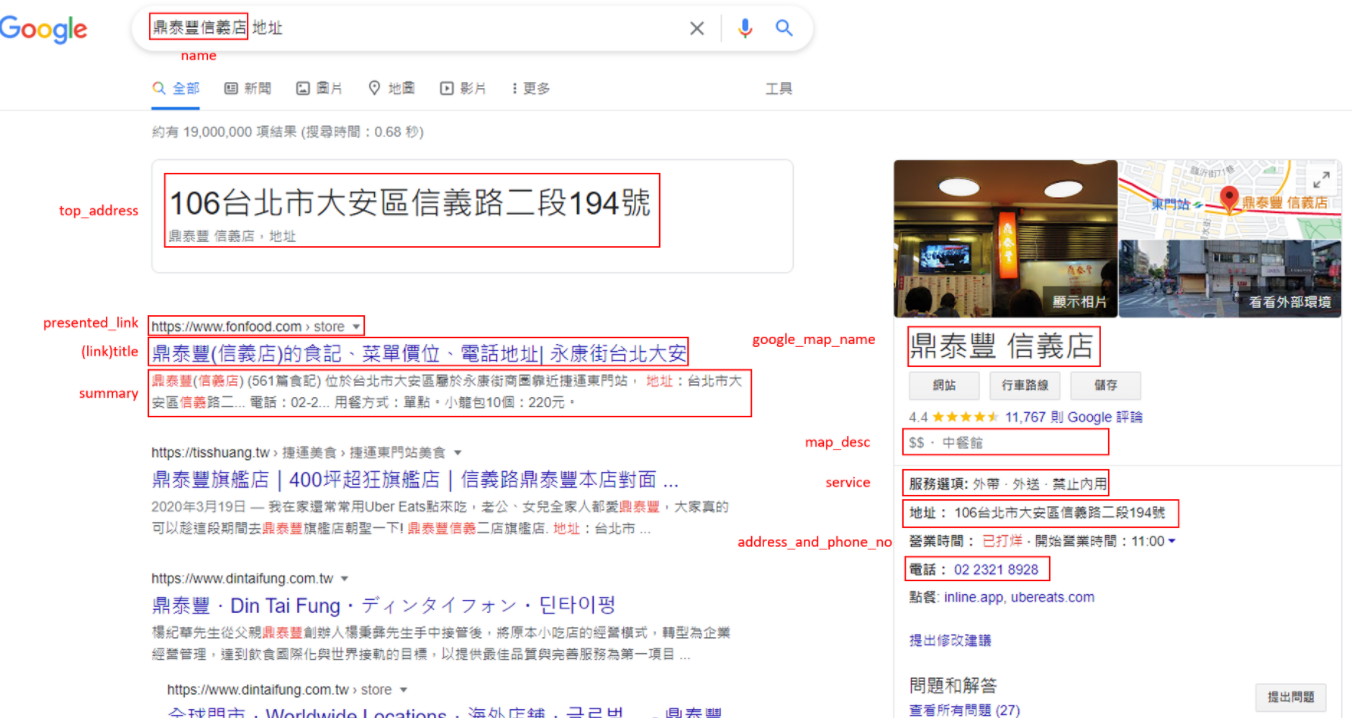

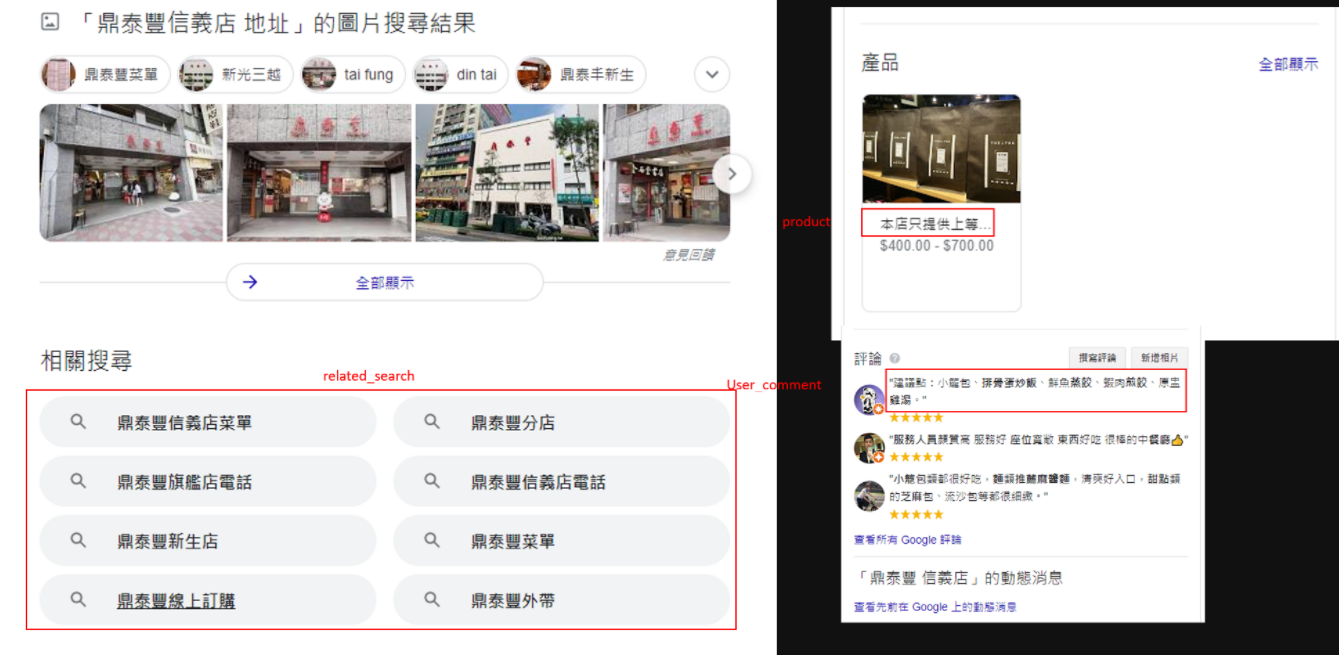

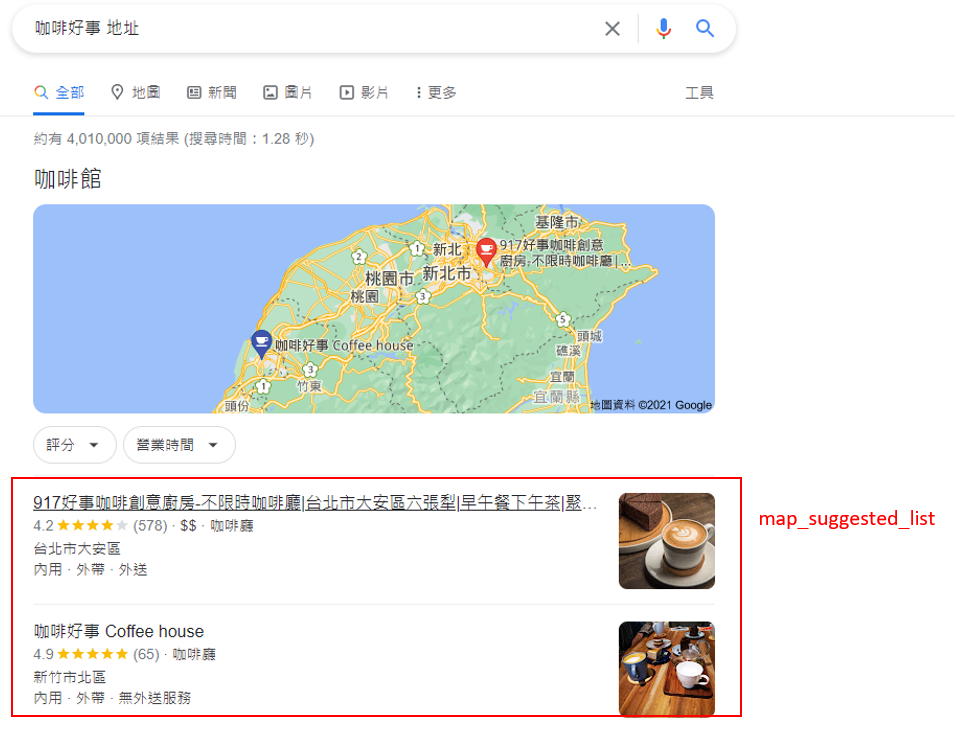

In [ ]:
import json
import requests
import time
import re
import os
import warnings

import pandas as pd

from requests.packages.urllib3.exceptions import InsecureRequestWarning
from collections import Counter
from bs4 import BeautifulSoup


""" 初始化 """
# 忽略不安全連線警告
warnings.simplefilter('ignore', InsecureRequestWarning)

# 使用header偽裝成edge瀏覽器下瀏覽行為
headers = {'content-type': 'text/html; charset = UTF-8', 
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36 Edg/95.0.1020.44'
          }
# 路名regex
with open(r'C:\Users\andrew.ce.tsai\Fubon\Project\Address Cleaner\address_regex.txt', 'r') as file:
    address_regex = file.read()

sleep_time = 5

def timer(func):
    def wrapper(*args, **kwargs):
        tic = time.time()
        value = func(*args, **kwargs)
        print('Time consumed: {} sec.'.format(time.time()-tic))
        return value
    return wrapper



class Merchant:
    def __init__(self, index, name):
        self.index = index
        self.name = name
        self.get_html()
        self.parse_attr()
        self.get_address()
        
    
    def get_html(self):
        url = 'https://google.com/search?q={}+地址'.format(self.name)
        count = 0
        
        while count < 3:
            try:
                result = requests.get(url, verify=False, auth=('user', 'pass'), headers=headers)
                if result.status_code == 200:
                    self.html = result.text
                    break
            except:
                time.sleep(sleep_time)
                count = count+1
        else:
            raise ConnectionError('Cannot get the html')
        
    
    def parse_attr(self):
        soup = BeautifulSoup(self.html, 'html.parser')
        self.soup = soup
        
        self.top_address = [element.text for element in soup.findAll('div', {'class':'sXLaOe'})]
        
        self.title_list = [element.find('h3').text for element in soup.findAll('div', {'class':'yuRUbf'})]
        self.summary_list = [element.text for element in soup.findAll('div', {'class':'VwiC3b yXK7lf MUxGbd yDYNvb lyLwlc lEBKkf'})]
        self.link_list = [element.find('a')['href'] for element in soup.findAll('div', {'class':'yuRUbf'})]
        self.presented_link_list = [element.text for element in soup.findAll('div', {'class':'TbwUpd NJjxre'})]
        
        self.service = [element.text.replace(u'\xa0', ' ') for element in soup.findAll('c-wiz', {'class':'u1M3kd W2lMue'})]
        self.product = [element.text for element in soup.findAll('div', {'class':'zPcHee'})]
        self.user_comment = [element.text for element in soup.findAll('a', {'class':'a-no-hover-decoration'})]
        
        self.address_and_phone_no = [element.text for element in soup.findAll('span', {'class':'LrzXr'})]
        self.phone_no = [element.text for element in soup.findAll('a', {'data-dtype':'d3ifr'})]
        self.map_desc = [element.text for element in soup.findAll('span', {'class':'YhemCb'})]
        self.map_suggested_list = [element.text for element in soup.findAll('div', {'class':'cXedhc'})]
        self.google_rating = [element.text for element in soup.findAll('span', {'class':'Aq14fc'})]
        self.google_map_name = [element.text for element in soup.findAll('h2', {'data-attrid':'title'})]
        
        self.related_search = [element.text for element in soup.findAll('div', {'class':'s75CSd OhScic AB4Wff'})]
    
    def get_address(self):
        
        if self.top_address:
            self.address = self.top_address[0]
            self.how_we_got_address = 1
            
        elif self.address_and_phone_no:
            self.address = self.address_and_phone_no[0]
            self.how_we_got_address = 2
            
        elif self.summary_list:
            self.address = self.get_address_from_summary()
            self.how_we_got_address = 3
        
        else:
            self.address = ''
            self.how_we_got_address = None
        
    def get_address_from_summary(self):
        '''
        This function gets all the addresses from summary,
        and returns the most frequent address.


        Args:
            A list of strings of summary from google search

        Returns:
            The most frequent address
        '''
        
        summary_list = self.summary_list
        digit2zh = {'0': '零','1': '一','2': '二','3': '三','4': '四',
                      '5': '五','6': '六','7': '七','8': '八','9': '九','10': '十'}
        matches_list = []
        content_list = list(set(summary_list))


        content_list = [sentence.replace('台', '臺') for sentence in content_list]

        # Find 'xx市xx區xx路xx號' by rgex
        for sentence in content_list:
            match = re.findall(address_regex, sentence)
            if match: 
                matches_list = matches_list + match

        # From 'xx路[1,2,3]段' to 'xx路[一,二,三]段'
        for i, match in enumerate(matches_list):
            if '段' in match:
                p_seg_no = match.rfind('段')-1
                if match[p_seg_no] in ['0','1','2','3','4','5','6','7','8','9','10']:
                    match = match[:p_seg_no] + digit2zh[match[p_seg_no]] + match[p_seg_no+1:]
                    matches_list[i] = match


        if len(set(matches_list)) == 1:
            return matches_list[0]

        # If there are more than one matches, find the most frequent one (by city then by itself)
        elif len(set(matches_list)) > 1:
            # Exctract all city exist in the matches_list and find the most frequent one 
            city_list = []
            for matches in matches_list:
                city = re.findall(r'(基隆市|臺北市|新北市|桃園市|新竹市|新竹縣|苗栗縣|臺中市|彰化縣|南投縣|雲林縣'
                    '|嘉義市|嘉義縣|臺南市|高雄市|屏東縣|臺東縣|花蓮縣|宜蘭縣|澎湖縣|金門縣|連江縣)', matches)
                city_list.append(city[0])
            city_list = Counter(city_list)
            city_key = max(city_list, key=city_list.get)

            # Find the most frequent address in the most frequent city.
            city_list = Counter([address for address in matches_list if city_key in address])
            city_key = max(city_list, key=city_list.get)
            address_ley = Counter([address for address in matches_list if city_key in address])
            address = max(address_ley, key=address_ley.get)
            return address

        else:
            return ''

    
    def to_dict(self, drop_html=True):
    
        result = {
                    'id' : self.index,
                    'name' : self.name,
                    'address' : self.address,
                    'how_we_got_address' : self.how_we_got_address,
                    'top_address' : self.top_address,
                    'title_list' : self.title_list,
                    'summary_list' : self.summary_list,
                    'link_list' : self.link_list,
                    'presented_link_list' : self.presented_link_list,
                    'service' : self.service,
                    'product' : self.product,
                    'user_comment' : self.user_comment,
                    'address_and_phone_no' : self.address_and_phone_no,
                    'phone_no' : self.phone_no,
                    'map_desc' : self.map_desc,
                    'map_suggested_list' : self.map_suggested_list,
                    'google_rating' : self.google_rating,
                    'google_map_name' : self.google_map_name,
                    'related_search' : self.related_search
                 }
        if not drop_html:
            result['html'] = self.html
        return result

In [ ]:
def restore_job_status(job_status):
    output_dir = r'C:\Users\andrew.ce.tsai\Fubon\Project\Address Cleaner\1208_result'
    success_list = []
    for file_name in os.listdir(output_dir):
        fp = output_dir+'\{}'.format(file_name)
        with open(fp) as f:
            data = json.load(f)
            success_list.extend([x['id'] for x in data])
    job_status['success_list'] = success_list
    for i in job_status['success_list']:
        job_status['todo'].remove(i)
        job_status['done_count'] += 1
    return job_status

store_df = pd.read_csv(r'C:\Users\andrew.ce.tsai\Fubon\Project\Address Cleaner\Merchant_List_0610.csv', header=None)
id2store = dict(store_df.values)
fp_output = r'C:\Users\andrew.ce.tsai\Fubon\Project\Address Cleaner\1208_result\result_{}.json'

job_status = {'fail_list' : [], 'success_list' : [], 'todo': list(id2store.keys()), 'done_count': 0}
job_status = restore_job_status(job_status)
result = list()
start_time = time.time()
tic = time.time()
toc = time.time()
for i in job_status['todo']:
    if time.time()-tic < sleep_time:
        time.sleep(sleep_time)
    tic = time.time()
    try:
        result.append(Merchant(i, id2store[i]).to_dict())
        job_status['success_list'].append(i)
    except:
        job_status['fail_list'].append(i)
    job_status['done_count'] += 1
    
    if job_status['done_count'] % 100 == 0: 
        print('Jobs done: {}\nTime consumed: {:.1f}\nTotal time consumed: {:.1f}'.format(job_status['done_count'], time.time()-toc, time.time()-start_time))
        print('Success count: {} Fail count: {}'.format(len(job_status['success_list']), len(job_status['fail_list'])))
        print('===========================================================================')
        toc = time.time()
        
    if job_status['done_count'] != 5000 and job_status['done_count'] % 1000 == 0:
        with open(fp_output.format(job_status['done_count']), 'w') as f:
            f.write(json.dumps(result))
        with open(r'C:\Users\andrew.ce.tsai\Fubon\Project\Address Cleaner\job_status.json', 'w') as f:
            json.dump(job_status, f)
        result = list()
        
with open(fp_output.format(job_status['done_count']), 'w') as f:
    f.write(json.dumps(result))